# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Joan Jalu Pangestu
- **Email:** m002d4ky2304@bangkit.academy
- **ID Dicoding:** joanjalup

## Menentukan Pertanyaan Bisnis

- Berasal dari kota mana mayoritas customer kita?
- Pembayaran jenis apa yang paling banyak dan paling sedikit digunakan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [4]:
customers_df = pd.read_csv("olist_customers_dataset.csv")
customers_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'olist_customers_dataset.csv'

In [4]:
order_payments_df = pd.read_csv("/content/drive/MyDrive/Kaggle/olist_order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assessing Data

#### Menilai tabel `customers_df`

In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


#### Menilai tabel `order_payments_df`

In [7]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [8]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

In [9]:
# Karena DataFrame customers_df dan order_payments_df tidak memiliki NaN dan
# DataType yang bersesuaian dengan pertanyaan bisnis maka tidak diperlukan untuk
# melakukan proses Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [10]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
62854,1e5de4c68af6db5151b970cd48dde46e,30e54b68d6303045310f552b7b46ac06,8630,suzano,SP
69018,2a50e9151ecf1b477d053cc68820a5a4,cf56ccfd32ac8a510501a6fa69972c74,26221,nova iguacu,RJ
26040,0fcee0348735ecb82c1a60d021fa3ea4,7cbfdb67d344d745e097fbb2a570c9e6,71881,brasilia,DF
78347,e4713a0e07528b06babe87ec0d8fe450,a6b4b3e1e8e21432ff89245ce6e317c0,24890,tangua,RJ
87919,657257c1377038d391004bf7aca86b79,d2f0b9e0fbf779c60ff56f493ca47cf1,72146,brasilia,DF


In [11]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [12]:
customers_df.customer_id.is_unique

True

In [13]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

### Explore `order_payments_df`

In [14]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
17621,e911951b98ae5dba91085dd2bfc69ccb,1,boleto,1,159.14
76166,752265739a6d8d671585c7b9c924b9d9,1,boleto,1,91.31
95648,a10a91a376b8f910600da4c459245e9f,1,debit_card,1,36.00
103625,021d35119e0e191a4fa47715d479b6f8,1,credit_card,2,97.08
74678,6f6b6e537442613468ece6f2df061159,1,credit_card,1,57.69


In [15]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [16]:
order_payments_df.order_id.is_unique

False

In [17]:
order_payments_df.order_id.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
103881    False
103882    False
103883    False
103884    False
103885    False
Name: order_id, Length: 103886, dtype: bool

In [18]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [19]:
order_payments_df.groupby(by="payment_type").order_id.count()

payment_type
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
Name: order_id, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berasal dari kota mana mayoritas customer kita?

In [35]:
df_plot = pd.DataFrame(customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False))
df_plot.head(6)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444


<ipython-input-36-9c16ffdc9819>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


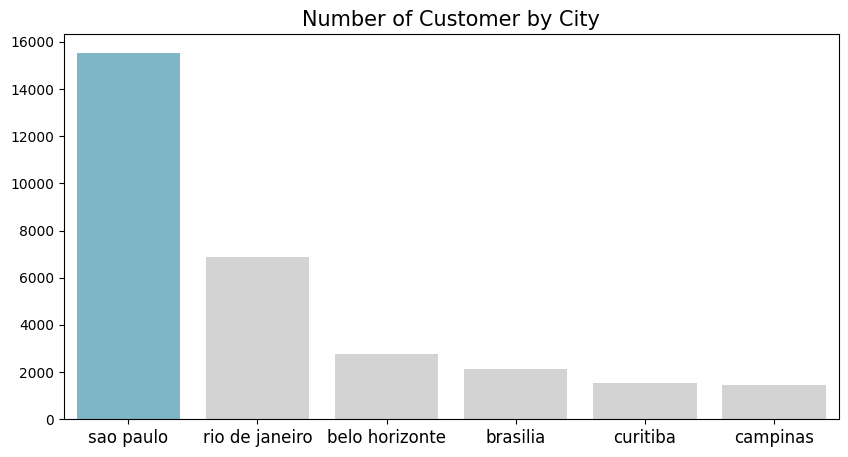

In [36]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="customer_id",
    x="customer_city",
    data=df_plot.head(6),
    palette=colors
)
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Pembayaran jenis apa yang paling banyak dan paling sedikit digunakan?

In [27]:
df_plot = pd.DataFrame(order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False))
df_plot

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


<ipython-input-33-2d5325fe71a2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


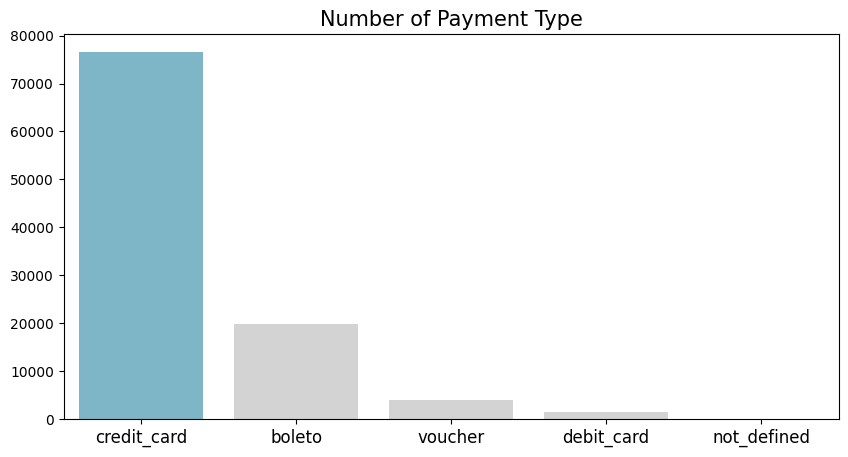

In [33]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="order_id",
    x="payment_type",
    data=df_plot,
    palette=colors
)
plt.title("Number of Payment Type", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Mayoritas customer kita berasal dari kota Sao Paulo
- Conclution pertanyaan 2 : Tipe pembayaran yang paling banyak digunakan adalah Kartu kredit dan yang paling sedikit adalah pembayaran lain-lain namun yang terdefinisi adalah kartu debit.